In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline 

In [2]:
data=pd.read_csv('economic_index.csv')

In [3]:
data.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [4]:
data.drop(columns=["Unnamed: 0","year","month"],inplace =True,axis=1)

In [5]:
data.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [6]:
data.shape

(24, 3)

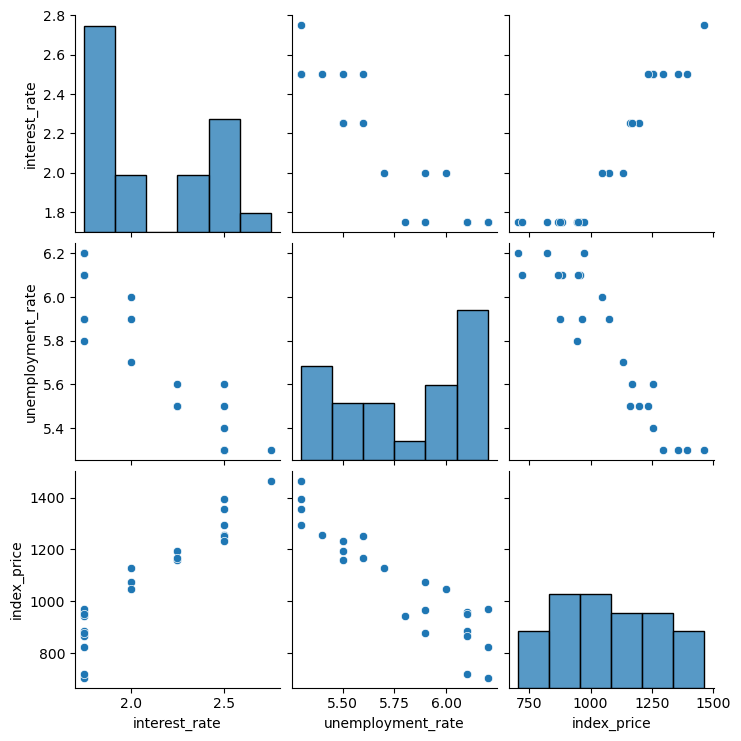

In [7]:
import seaborn as sns
sns.pairplot(data)
plt.show()

In [8]:
data.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


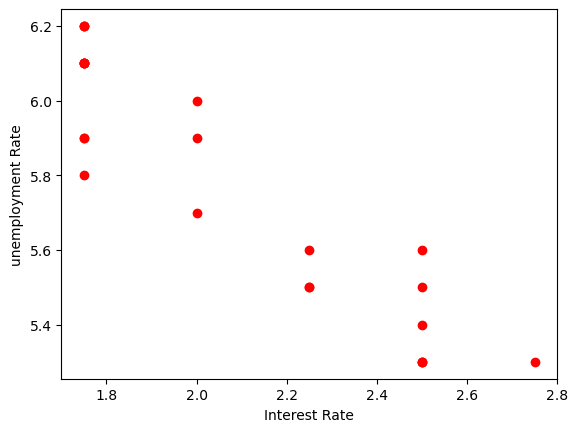

In [9]:
plt.scatter(data['interest_rate'],data['unemployment_rate'],color='r')
plt.xlabel("Interest Rate")
plt.ylabel("unemployment Rate")
plt.show()



In [10]:
X=data.iloc[:,:-1] # Here all columns except last column
y=data.iloc[:,-1] # Here only last column

In [11]:
X.head()

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [12]:
y

0     1464
1     1394
2     1357
3     1293
4     1256
5     1254
6     1234
7     1195
8     1159
9     1167
10    1130
11    1075
12    1047
13     965
14     943
15     958
16     971
17     949
18     884
19     866
20     876
21     822
22     704
23     719
Name: index_price, dtype: int64

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [14]:
import seaborn as sns

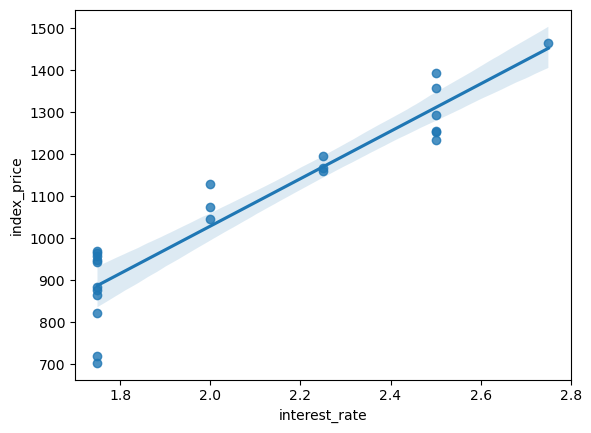

In [15]:
sns.regplot(x=data['interest_rate'],y=data['index_price'])
plt.show()

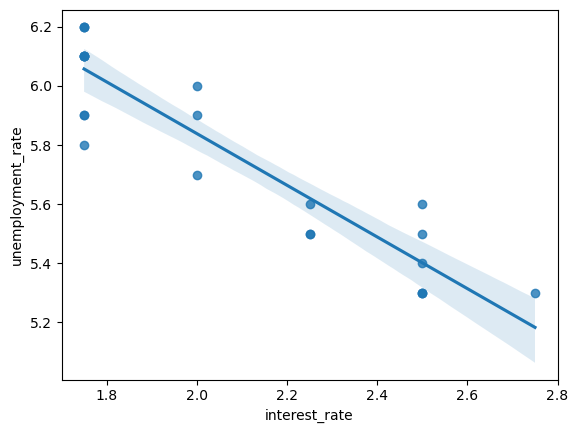

In [16]:
sns.regplot(x=data['interest_rate'],y=data['unemployment_rate'])
plt.show()


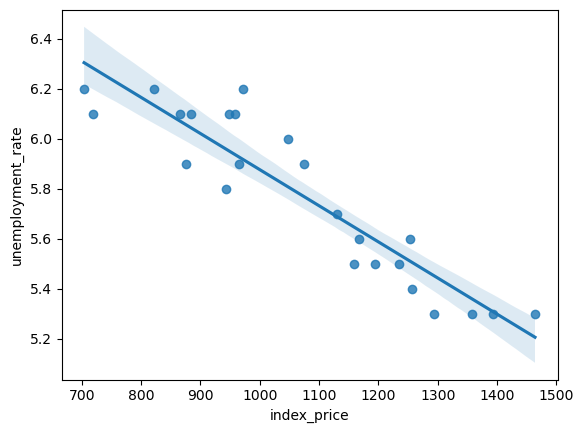

In [17]:
sns.regplot(x=data['index_price'],y=data['unemployment_rate'])
plt.show()

In [18]:
from sklearn.preprocessing import StandardScaler


In [19]:
scaler=StandardScaler() 
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [20]:
X_train

array([[-0.90115511,  0.37908503],
       [ 1.31077107, -1.48187786],
       [-0.90115511,  1.30956648],
       [ 1.31077107, -0.55139641],
       [ 1.31077107, -1.48187786],
       [-0.16384638,  0.68924552],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -1.48187786],
       [ 1.31077107, -1.17171738],
       [-0.90115511,  1.30956648],
       [-0.90115511,  0.999406  ],
       [-0.90115511,  0.37908503],
       [-0.90115511,  0.999406  ],
       [ 0.57346234, -0.8615569 ],
       [-0.16384638, -0.24123593],
       [-0.90115511,  0.06892455],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -0.8615569 ]])

In [21]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()


In [22]:
regression.fit(X_train,y_train)

LinearRegression()

In [23]:
## cross check ## This is don to check : Is my model actually learning the pattern, or just memorizing this one split of data
from sklearn.model_selection import cross_val_score
validation_score=cross_val_score(regression,X_train,y_train,scoring='neg_mean_squared_error',cv=3)

In [24]:
np.mean(validation_score)

-5914.8281801623925

In [25]:
y_pred=regression.predict(X_test)

In [26]:
y_pred

array([1204.22770398,  821.65051903, 1406.51300368,  857.70889608,
        994.90992298, 1168.16932693])

In [27]:
## Performance Metrix :--

from sklearn.metrics import mean_absolute_error,mean_squared_error
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print("Mean Squared Error:",mse)
print("Mean Absolute Error:",mae)
print("Root Mean Squared Error:",rmse)

Mean Squared Error: 5793.76288771258
Mean Absolute Error: 59.93578152323554
Root Mean Squared Error: 76.11677139574813


In [28]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print(score)
#Display adjusted R-squared value
print(1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

0.8278978091457142
0.713163015242857


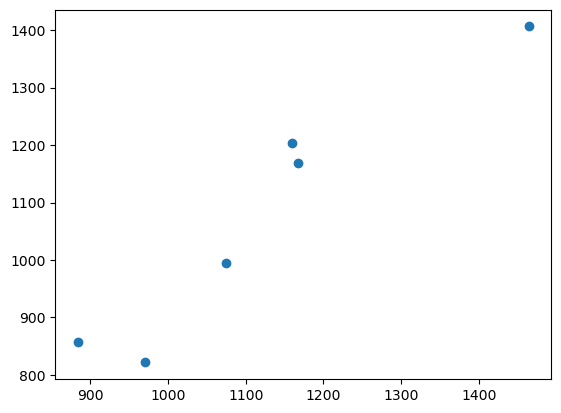

In [29]:
plt.scatter(y_test,y_pred)
plt.show()

In [30]:
residuals=y_test-y_pred
print(residuals)

8     -45.227704
16    149.349481
0      57.486996
18     26.291104
11     80.090077
9      -1.169327
Name: index_price, dtype: float64


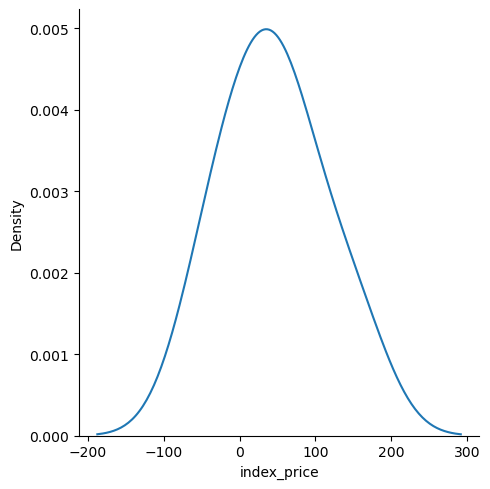

In [31]:
# Plot this residuals
sns.displot(residuals,kind='kde')
plt.show()

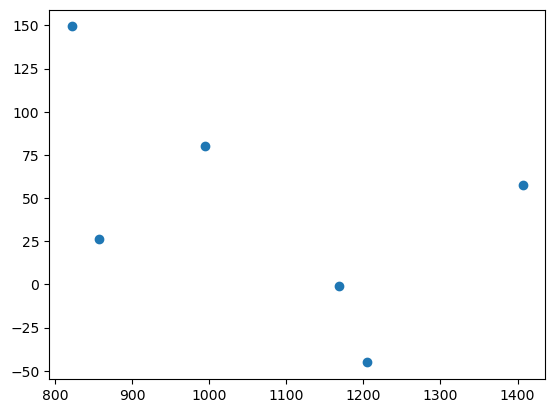

In [32]:
plt.scatter(y_pred,residuals)
plt.show()

In [33]:
## OLS Linear Regression
import statsmodels.api as sm
model=sm.OLS(y_train,X_train).fit()

In [34]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Sun, 25 Jan 2026   Prob (F-statistic):                       0.754
Time:                        00:00:37   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/Applications/anaconda3/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  res = hypotest_fun_out(*samples, **kwds)


In [35]:
print(regression.coef_) # Coefficent are simillar with OLS Regression result.  Proves Model is Correct 

[  88.27275507 -116.25716066]


In [36]:
new_data = np.array([[10, 5]])
prediction = model.predict(new_data)
print(prediction)

[301.44174739]


In [37]:
# 📈 interest_rate → +88.27
#	•	If interest rate increases by 1 unit
#	•	Index price increases by ~88
#	•	(according to THIS dataset)

# 📉 unemployment_rate → −116.26
#	•	If unemployment increases by 1 unit
#	•	Index price decreases by ~116

# This matches economic intuition:
#	•	Higher unemployment → weaker markets 📉